In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Our first dataset is the "tips" dataset. This dataset is used to train a model to predict tip based on total bill, whether the person is smoker, male or female, day, size of table and food of the day.

In [2]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Another dataframe flights, contains number of passenger carried by an airlines for various months over a number of years.

In [3]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


Our third dataset is the famous "iris" dataset. This dataset is used to train aa model to predict iris species based on sepal and petal length and width.

In [4]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 1. Heatmap

### Using Heatmap with correlation data

A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types. It is very important in Feature Selection

In [5]:
#Compute pairwise correlation of columns, excluding NA/null values
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


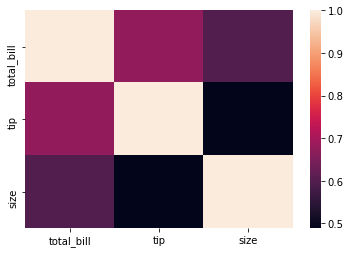

In [6]:
#Plot correlation data as a color-encoded matrix
sns.heatmap(tips.corr())

We can use "annot=True" to write the data value in each cell. We know that pearson correlation coefficient ranges from -1 to 1, but heatmap infered from data another range. So to properly show strength of correlation with the help of color, we can change the scale using vmin=-1 and vmax=1.

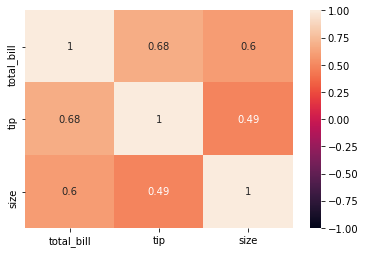

In [7]:
sns.heatmap(tips.corr(), annot=True, vmin=-1, vmax=1)

### Using Heatmap with time series data

We use heatmap with time series data to study the variation over time. But we often need to bring time series data in a format suitable for heatmap. Here, we will simply pivot the dataframe.

In [8]:
flights = flights.pivot(index="month", columns="year", values="passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


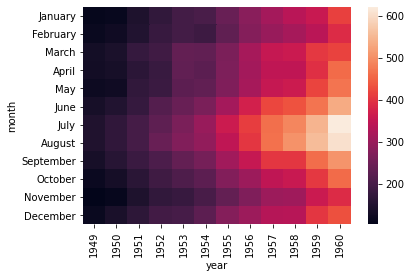

In [9]:
sns.heatmap(flights)

We can modify the markers in heatmap using "xticklabels" and "yticklabels" parameters. For example, we can turn the markers off or choose to show every second marker.

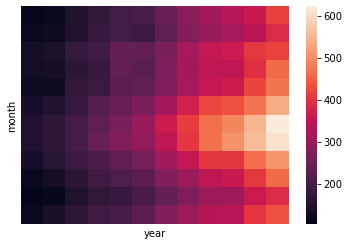

In [10]:
sns.heatmap(flights, xticklabels=False, yticklabels=False)

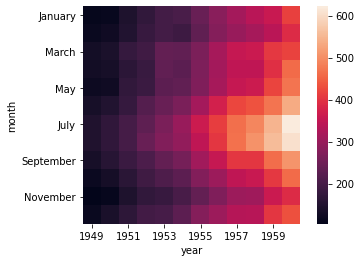

In [11]:
sns.heatmap(flights, xticklabels=2, yticklabels=2, square=True)

Again, we can use "annot=True" to show the values in each cell. We can also specify the format using "fmt" parameter. We can also choose to remove the color bar.

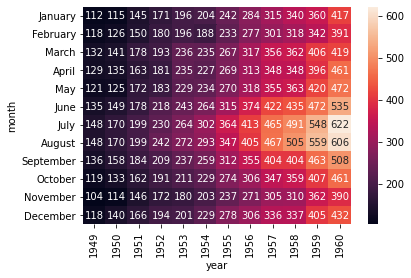

In [12]:
sns.heatmap(flights, annot=True, fmt="d")

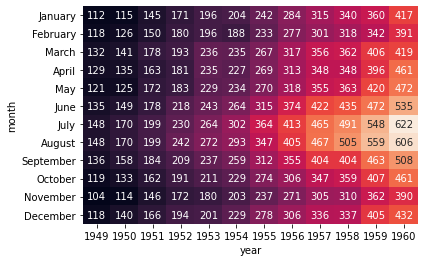

In [13]:
sns.heatmap(flights, annot=True, fmt="d", cbar=False)

## 2. distplot - Distribution Plot

We use distplot to understand the distribution of data in a feature. It combines the matplotlib's "hist" function (with automatic calculation of a good default bin size) with the seaborn's "kdeplot" and "rugplot" functions. It can also fit "scipy.stats" distributions and plot the estimated PDF over the data.

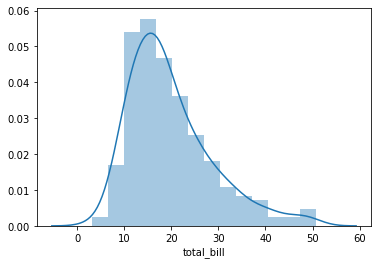

In [14]:
sns.distplot(tips.total_bill)

By default rugplot is turned off but we can change that. Also, note that if we are plotting kde, value counts for each bin will be normalized.

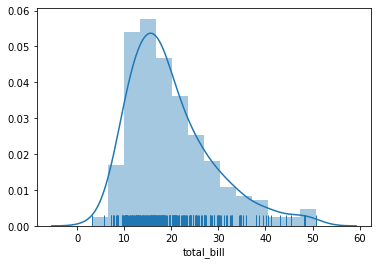

In [15]:
sns.distplot(tips.total_bill, hist=True, kde=True, rug=True)

We can draw a histogram with value counts by turning kde off and passing "norm_hist=False" i.e. normalized histogram = False.

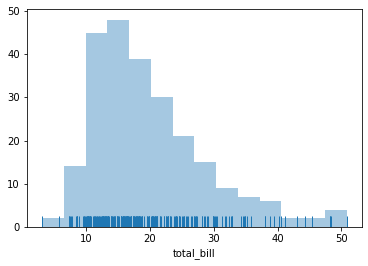

In [16]:
sns.distplot(tips.total_bill, hist=True, kde=False, rug=True, norm_hist=False)

The distribution of total bill looks like gamma distribution, we can turn off kde and pass the distribution we want to plot to "fit" parameter.

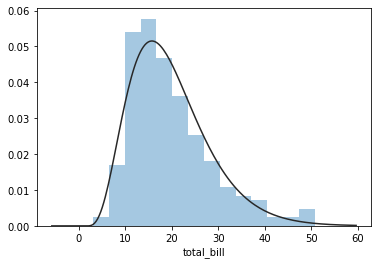

In [17]:
from scipy import stats
sns.distplot(tips.total_bill, kde=False, fit=stats.gamma)

## 3. KDEplot - Kernel Density Estimate plot

KDEplot is more flexible than distplot for plotting distribution of features. It can plot a univariate or bivariate kernel density estimate. Moreover, we can change kde kernel which is always taken as Gaussion in distplot.

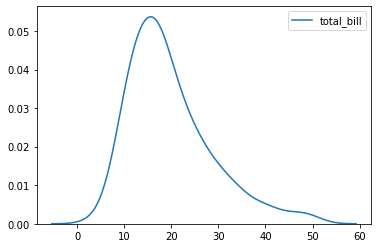

In [18]:
sns.kdeplot(tips.total_bill)

We can fill the area under curve using "shade=True".

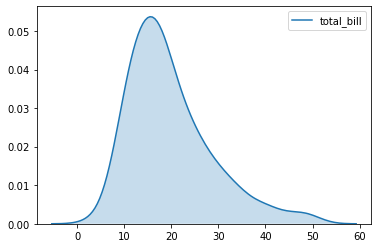

In [19]:
sns.kdeplot(tips.total_bill, shade=True)

If we have many observations in a very small area, a scatterplot usually is not that helpful as points tend to overlap. In this case the 2D density plot is a better choice. It counts the number of observations within a particular area of the 2D space and represents it with contours, like the graph below.

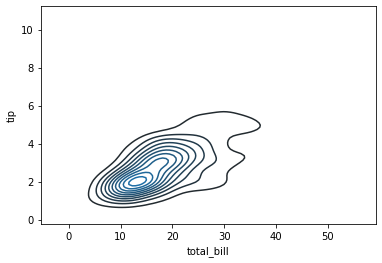

In [20]:
sns.kdeplot(tips.total_bill, tips.tip)

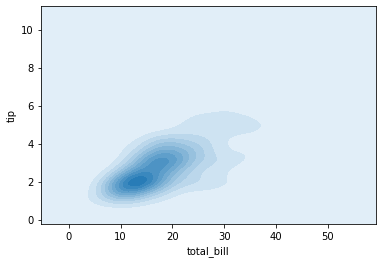

In [21]:
sns.kdeplot(tips.total_bill, tips.tip, shade=True)

We can also change the number of contours we want.

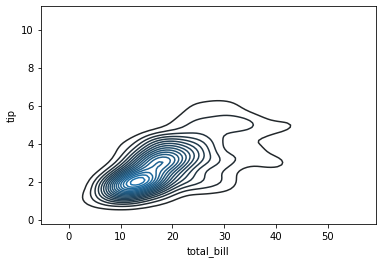

In [22]:
sns.kdeplot(tips.total_bill, tips.tip, n_levels=20)

We can also change the kernel and bandwidth.

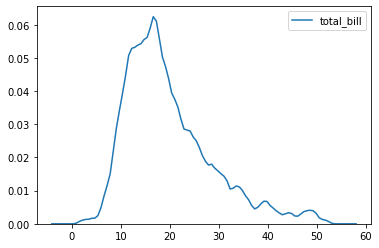

In [23]:
sns.kdeplot(tips.total_bill, kernel="cos", bw="silverman")

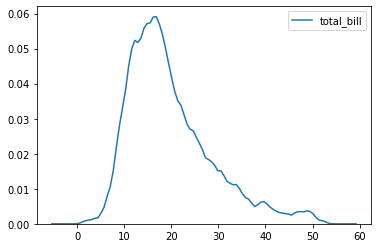

In [24]:
sns.kdeplot(tips.total_bill, kernel="epa", bw="scott")

We can draw a cummulative plot as well

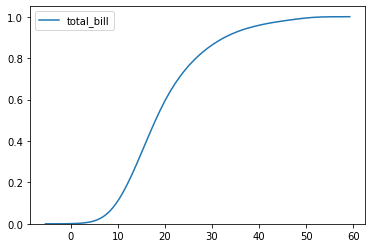

In [25]:
sns.kdeplot(tips.total_bill, cumulative=True)

We use "cut" parameter to control the extent of plot. "cut=0" will stop the plot at the extreme data points we have thus kdeplot will not extrapolate the curve.

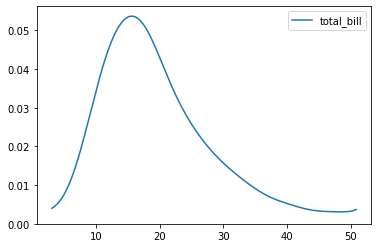

In [26]:
sns.kdeplot(tips.total_bill, cut=0)

We use "clip" parameter to control the extent of data. "clip=(0,30)" will use data for total_bill only within that range. Note that kdeplot will extrapolate the plot outside the range.

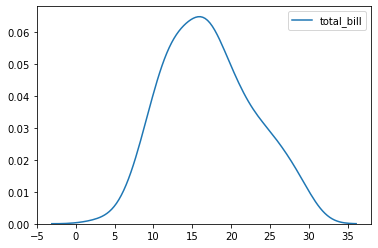

In [27]:
sns.kdeplot(tips.total_bill, clip=(0,30))

We can add rugplot to kdeplot by plotting both plots on same space.

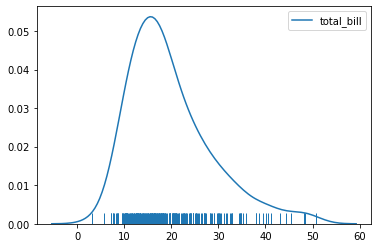

In [28]:
sns.kdeplot(tips.total_bill)
sns.rugplot(tips.total_bill)

## 4. Joint plot

A jointplot allows us to study the relationship between two numeric features. The central plot displays interaction between the features and plots at margins represents their individual distribution.

By default a scatter plot is drawn at center with histogram for each feature on the top and side respectively.

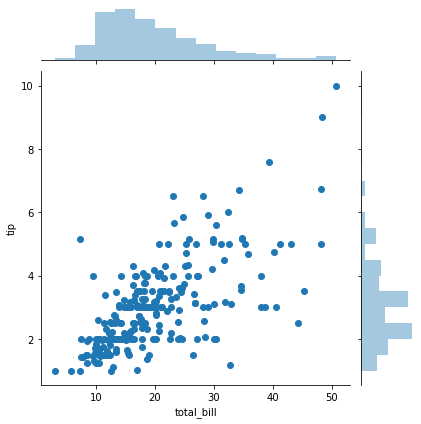

In [29]:
sns.jointplot(x="total_bill", y="tip", data=tips)

It is often helpful to draw a line to show the relationship of two numerical variables is positive or negative. We can change the scatter plot to regression plot by passing "kind='reg'". jointplot, by default, constructs distribution plots at margins when we use regression plot at center.

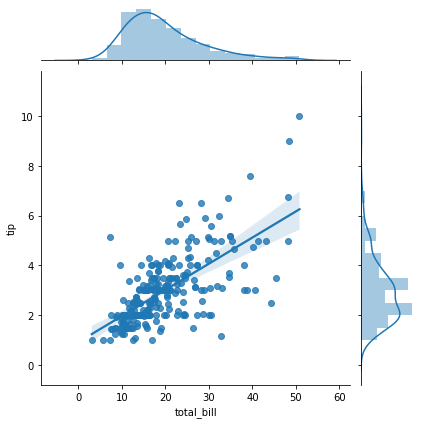

In [30]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

A Hexbin plot shows the relationship of two numerical variables, with the distributions of each variable on the top and side respectively. In order to show the joint distributions, the plotting window is split into hexbins, and the number of points per hexbin is counted. The color denotes this number of points.

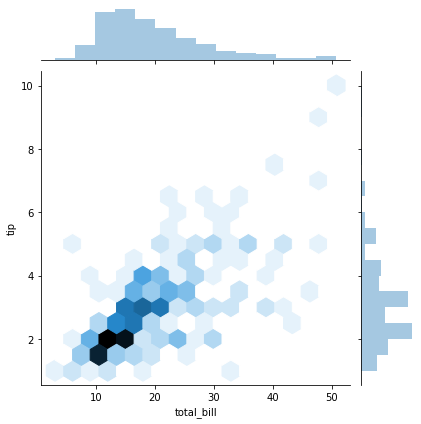

In [31]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")

The dark hexbins indicate total bill is usually between 10 and 20 dollar and the tip is around $2.

We can also draw a bivariate density plot using jointplot with "kind='kde'"

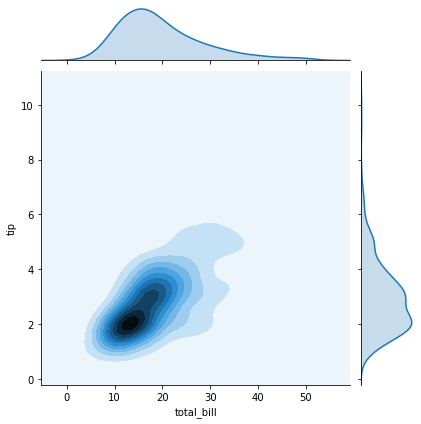

In [32]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde")

We can also jointplot to perform statistical computation between the two features.

In [33]:
from scipy.stats import pearsonr, spearmanr

C:\Users\ujwal\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


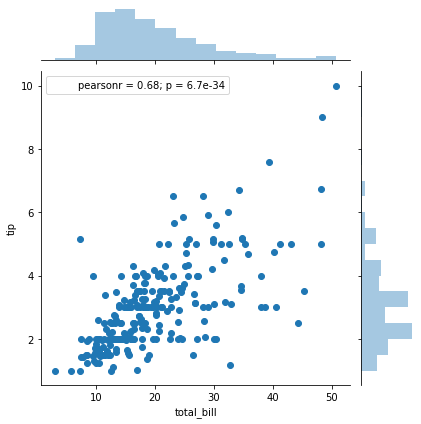

In [34]:
sns.jointplot(x="total_bill", y="tip",
              data=tips, stat_func=pearsonr)

C:\Users\ujwal\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


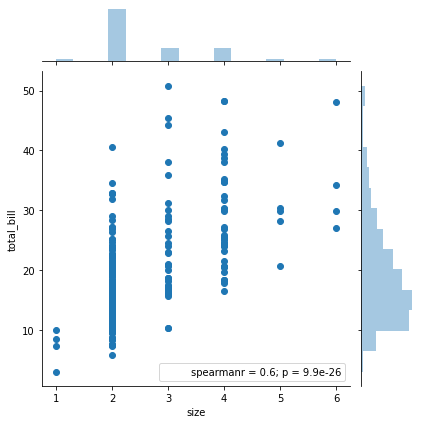

In [35]:
sns.jointplot("size", "total_bill",
              data=tips, stat_func=spearmanr)

We can use plot_joint() method with joint plot to add other plots in the central region.

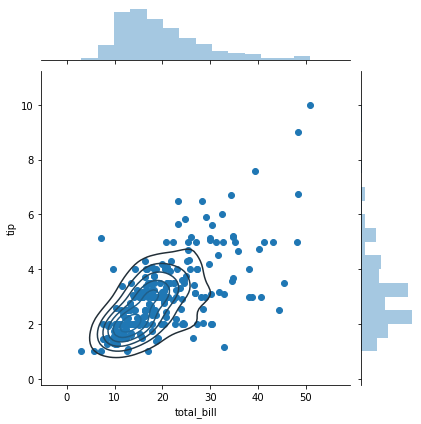

In [36]:
(sns.jointplot(x="total_bill", y="tip", data=tips)
.plot_joint(sns.kdeplot, n_levels=6))

We can use plot_marginals() method with jointplot to add other plots in the marginal region.

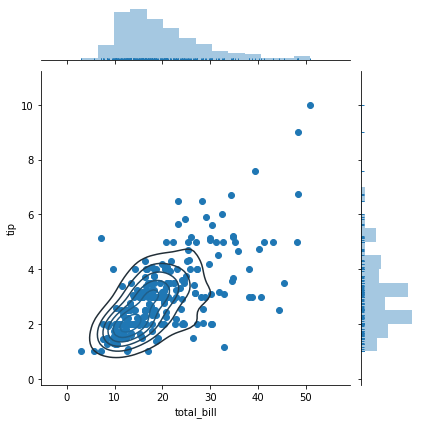

In [37]:
(sns.jointplot(x="total_bill", y="tip", data=tips)
.plot_joint(sns.kdeplot, n_levels=6)
.plot_marginals(sns.rugplot))

## 5. Pair plot

pairplot plots pairwise relationships in a dataset. By default, this function will create a grid of Axes such that each numeric
variable in dataset will be constant in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

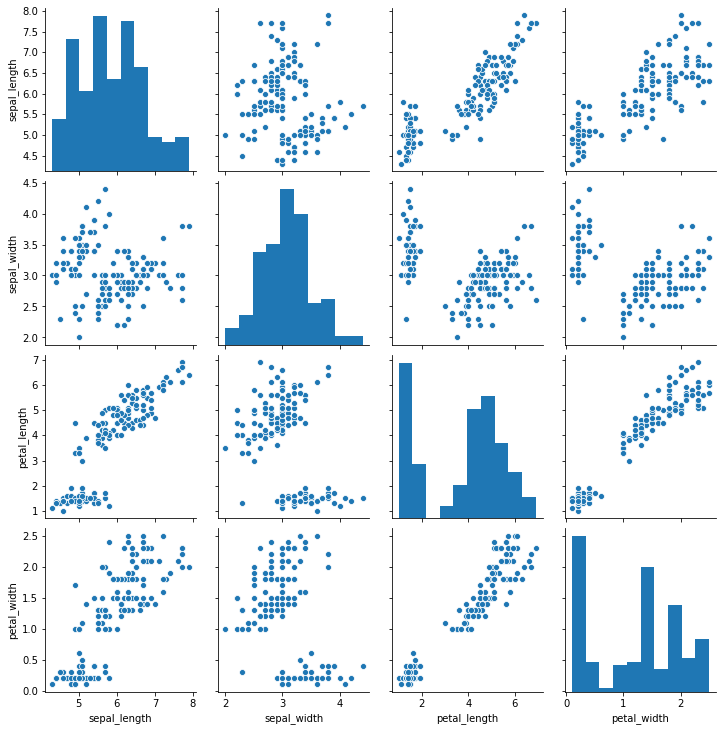

In [38]:
sns.pairplot(iris)

Instead of histograms, we can ask pairplot for distribution plots along the diagonals.

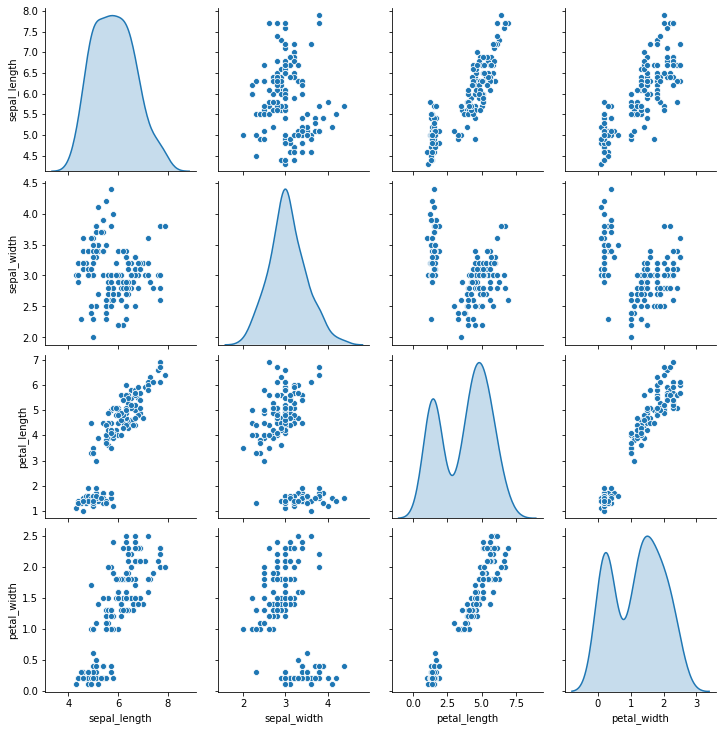

In [39]:
sns.pairplot(iris, diag_kind="kde")

If we want to add information from categorical data type, we can use "hue" parameter. It will color code features from different categories differently. When we add "hue" parameter, pairplot, by default, replaces the histograms with distribution plot.

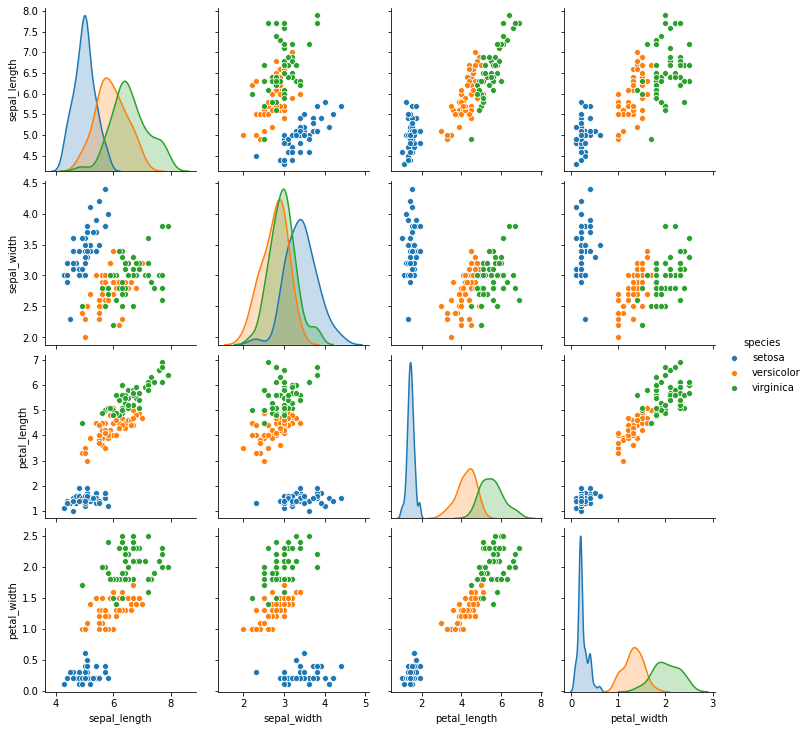

In [40]:
sns.pairplot(iris, hue="species")

If we want histogram instead of distribution plot, we can ask pairplot to do that. Personally, however, with "hue", I have found distribution plot much easier to read than histograms.

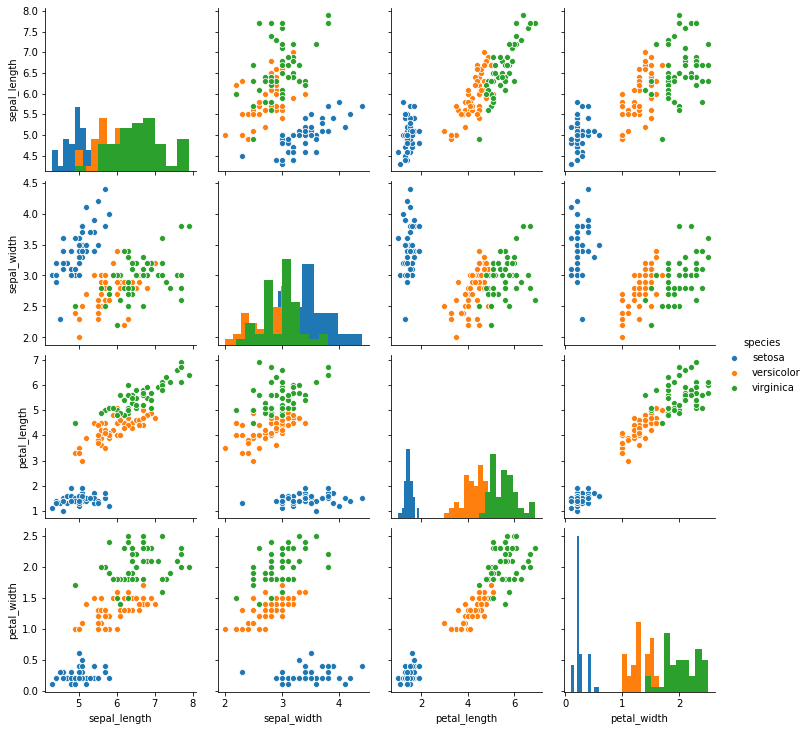

In [41]:
sns.pairplot(iris, hue="species", diag_kind="hist")

We can also change the markers for representing different categories differently.

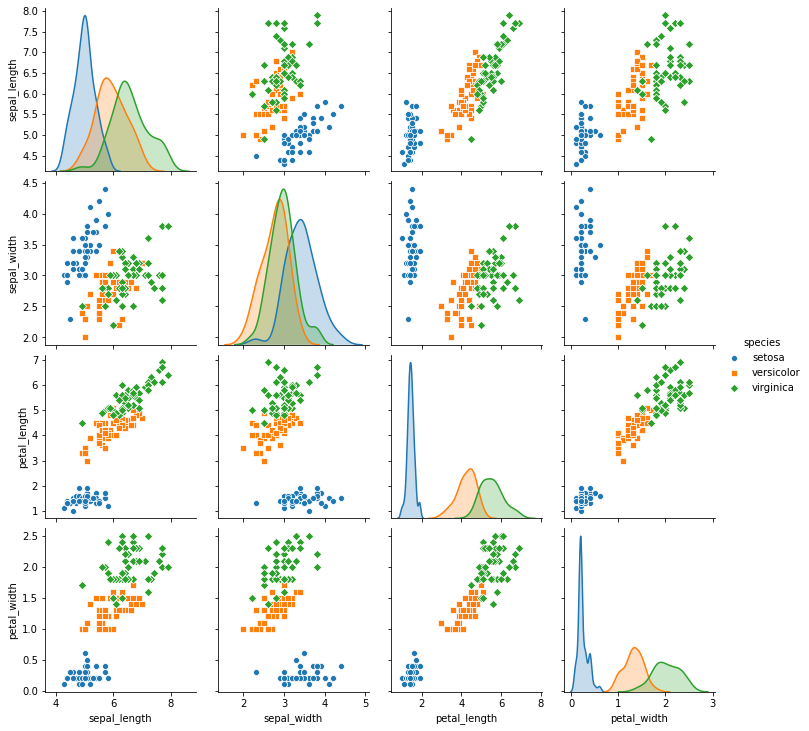

In [42]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

It is also possible to show a subset of variables instead of all of them. 

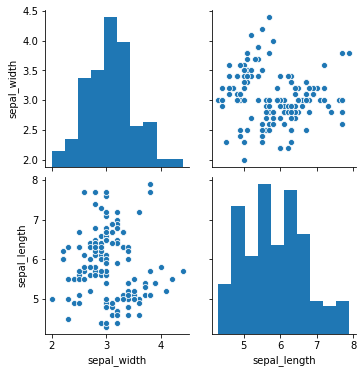

In [43]:
sns.pairplot(iris, vars=["sepal_width", "sepal_length"])

It is also possible to plot different variables on the rows and columns. If the namea don't overlap, we won't see any histogram.

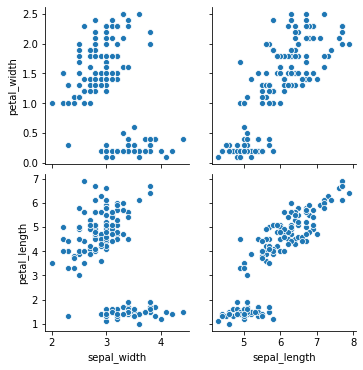

In [44]:
sns.pairplot(iris,
             x_vars=["sepal_width", "sepal_length"], 
             y_vars=["petal_width", "petal_length"])

Instead of scatter plot, we can also ask pairpot to draw regression plot using "kind" parameter.

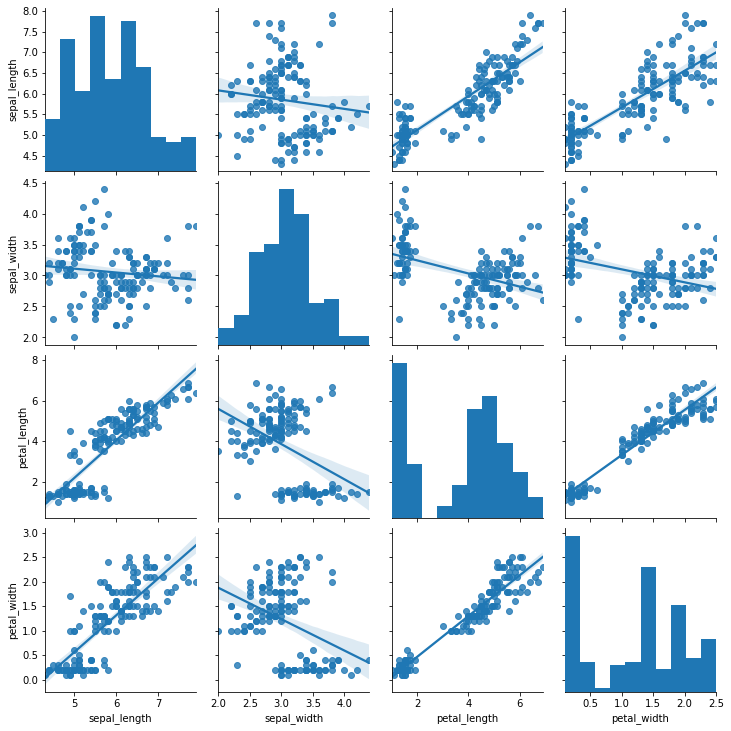

In [45]:
sns.pairplot(iris, kind="reg")

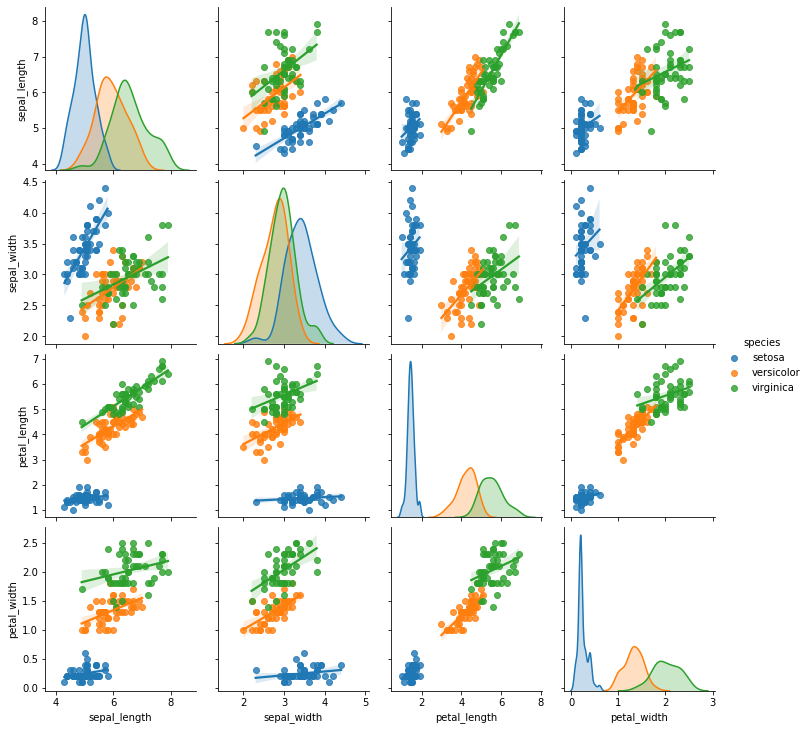

In [46]:
sns.pairplot(iris, kind="reg", hue="species")